# Predictive Modeling - Basics of Forecasting
As we disscused earlier, the goal of forecasting is to predict the event that have not been occurred by using the predictor variable available beforehand. We will apply this logic to obtain the predicted values in the context of NHL data. In essesnce, we will use the pythagorean winning % from the first half of the regular season to "predict" the winning percentage of the remaining season. Then, we will compare the performance of the model against the model that used winning % as a predictor variable.

## 1. Import Libraries and Dataset

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
####Import Data####
NHL_game = pd.read_csv("../../Data/Week 1/NHL_game2.csv")

In [3]:
# Filter rows for 2016 NHL Regular Season
NHL_reg_2016 =  NHL_game[NHL_game.competition_name == '2016 NHL Regular Season'].copy()
display(NHL_reg_2016[0:10])

,comp_id,competition_name,date,gid,goals_against,goals_for,hgd,home_away,team_name,tid,tricode,type,win,win.ord,year
6395,2734,2016 NHL Regular Season,2017-04-01,5038,2.0,1.0,-1.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2016
6396,2734,2016 NHL Regular Season,2016-11-05,3068,1.0,4.0,3.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016
6397,2734,2016 NHL Regular Season,2017-03-12,4719,2.0,3.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016
6398,2734,2016 NHL Regular Season,2017-01-13,3987,2.0,3.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016
6399,2734,2016 NHL Regular Season,2017-03-21,4876,5.0,3.0,-2.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2016
6400,2734,2016 NHL Regular Season,2017-03-18,4830,5.0,3.0,-2.0,home,Tampa Bay Lightning,25,TBL,2,0.0,0.0,2016
6401,2734,2016 NHL Regular Season,2017-03-30,5008,3.0,5.0,2.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016
6402,2734,2016 NHL Regular Season,2017-02-28,4555,1.0,5.0,4.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016
6403,2734,2016 NHL Regular Season,2017-02-05,4271,4.0,5.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016
6404,2734,2016 NHL Regular Season,2016-12-04,3462,2.0,3.0,1.0,home,Tampa Bay Lightning,25,TBL,2,1.0,2.0,2016


## 2. Data Preparation

In [4]:
#Drop unnecessary columns
NHL_reg_2016.drop(['comp_id'], axis=1, inplace=True)
NHL_reg_2016.drop(['competition_name'], axis=1, inplace=True)
NHL_reg_2016.drop(['team_name'], axis=1, inplace=True)
NHL_reg_2016.drop(['win.ord'], axis=1, inplace=True)
NHL_reg_2016.drop(['year'], axis=1, inplace=True)
display(NHL_reg_2016[0:10])

,date,gid,goals_against,goals_for,hgd,home_away,tid,tricode,type,win
6395,2017-04-01,5038,2.0,1.0,-1.0,home,25,TBL,2,0.0
6396,2016-11-05,3068,1.0,4.0,3.0,home,25,TBL,2,1.0
6397,2017-03-12,4719,2.0,3.0,1.0,home,25,TBL,2,1.0
6398,2017-01-13,3987,2.0,3.0,1.0,home,25,TBL,2,1.0
6399,2017-03-21,4876,5.0,3.0,-2.0,home,25,TBL,2,0.0
6400,2017-03-18,4830,5.0,3.0,-2.0,home,25,TBL,2,0.0
6401,2017-03-30,5008,3.0,5.0,2.0,home,25,TBL,2,1.0
6402,2017-02-28,4555,1.0,5.0,4.0,home,25,TBL,2,1.0
6403,2017-02-05,4271,4.0,5.0,1.0,home,25,TBL,2,1.0
6404,2016-12-04,3462,2.0,3.0,1.0,home,25,TBL,2,1.0


We will use the 1st half of the season to predict the winning percentage in the later half of the saeson by using 1)win% and 2)pyth.win%.
Given that the NHL regular season runs from early October to April, we can get the balanced data by splitting games played in 2016 & games played in 2017 during the regular season.

In [5]:
NHL_reg_2016['year'] = pd.DatetimeIndex(NHL_reg_2016['date']).year
display(NHL_reg_2016[0:10])

,date,gid,goals_against,goals_for,hgd,home_away,tid,tricode,type,win,year
6395,2017-04-01,5038,2.0,1.0,-1.0,home,25,TBL,2,0.0,2017
6396,2016-11-05,3068,1.0,4.0,3.0,home,25,TBL,2,1.0,2016
6397,2017-03-12,4719,2.0,3.0,1.0,home,25,TBL,2,1.0,2017
6398,2017-01-13,3987,2.0,3.0,1.0,home,25,TBL,2,1.0,2017
6399,2017-03-21,4876,5.0,3.0,-2.0,home,25,TBL,2,0.0,2017
6400,2017-03-18,4830,5.0,3.0,-2.0,home,25,TBL,2,0.0,2017
6401,2017-03-30,5008,3.0,5.0,2.0,home,25,TBL,2,1.0,2017
6402,2017-02-28,4555,1.0,5.0,4.0,home,25,TBL,2,1.0,2017
6403,2017-02-05,4271,4.0,5.0,1.0,home,25,TBL,2,1.0,2017
6404,2016-12-04,3462,2.0,3.0,1.0,home,25,TBL,2,1.0,2016


## 3. Data Manipulation

### 3.1) Split the data into two datasets

In [6]:
# Now we choose the games played in the calendar year of 2016 to obtain the pythagorean win % and win % as basis for forecasting
NHL_2016_1st =  NHL_reg_2016[NHL_reg_2016.year == 2016].copy()
display(NHL_2016_1st[0:5])

,date,gid,goals_against,goals_for,hgd,home_away,tid,tricode,type,win,year
6396,2016-11-05,3068,1.0,4.0,3.0,home,25,TBL,2,1.0,2016
6404,2016-12-04,3462,2.0,3.0,1.0,home,25,TBL,2,1.0,2016
6406,2016-11-11,3137,1.0,4.0,3.0,home,25,TBL,2,1.0,2016
6407,2016-10-13,2751,4.0,6.0,2.0,home,25,TBL,2,1.0,2016
6409,2016-11-24,3323,2.0,4.0,2.0,home,25,TBL,2,1.0,2016


In [7]:
# Extract the 2nd half of the season (games played in the calendar year of 2017)
NHL_2016_2nd =  NHL_reg_2016[NHL_reg_2016.year == 2017].copy()
display(NHL_2016_2nd[0:5])

,date,gid,goals_against,goals_for,hgd,home_away,tid,tricode,type,win,year
6395,2017-04-01,5038,2.0,1.0,-1.0,home,25,TBL,2,0.0,2017
6397,2017-03-12,4719,2.0,3.0,1.0,home,25,TBL,2,1.0,2017
6398,2017-01-13,3987,2.0,3.0,1.0,home,25,TBL,2,1.0,2017
6399,2017-03-21,4876,5.0,3.0,-2.0,home,25,TBL,2,0.0,2017
6400,2017-03-18,4830,5.0,3.0,-2.0,home,25,TBL,2,0.0,2017


### 3.2) Generate a team level dataset
We will generate a team level dataset called "nhl2016_pre" that aggregate the total number of games won, the total number of goals_for and goals_against for each team; (we will use this to create a 1) win% and 2) pythwin% for prediciton. We will use win % and pyth_win% from this data set to predict the win% of the 2nd half of the regular season

In [10]:
# Aggregate game level statistics to a group (i.e., team) level statistics
nhl2016_pre = NHL_2016_1st.groupby(['tricode'])['win','goals_for','goals_against'].sum()
display(nhl2016_pre[0:9])

,win,goals_for,goals_against
tricode,,,
ANA,18.0,108.0,111.0
ARI,10.0,72.0,105.0
BOS,20.5,98.0,96.0
BUF,13.0,79.0,105.0
CAR,16.0,96.0,99.0
CBJ,26.0,125.0,74.0
CGY,18.5,98.0,104.0
CHI,23.0,110.0,95.0
COL,12.0,72.0,116.0


In [11]:
# Obtain the number of games played by each team for the 1st half of the 2016 regular season
NHL_pre_GameNum = NHL_2016_1st.groupby(['tricode']).size().reset_index(name='game_count')
display(NHL_pre_GameNum[0:3])

,tricode,game_count
0,ANA,38
1,ARI,33
2,BOS,39


In [12]:
# Merge total number of games (i.e., NNL_pre_gameNUM) to the dataset
nhl2016_pre=pd.merge(nhl2016_pre, NHL_pre_GameNum, on=['tricode'])
nhl2016_pre.head()

,tricode,win,goals_for,goals_against,game_count
0,ANA,18.0,108.0,111.0,38
1,ARI,10.0,72.0,105.0,33
2,BOS,20.5,98.0,96.0,39
3,BUF,13.0,79.0,105.0,36
4,CAR,16.0,96.0,99.0,35


### 3.4) Create additional variables in the nhl2016_pre dataset:
- winning % 
- pyth win% 

In [13]:
nhl2016_pre['win_pct_pre']=nhl2016_pre['win']/nhl2016_pre['game_count']
nhl2016_pre['pyth_wpct_pre']=nhl2016_pre['goals_for']**2/(nhl2016_pre['goals_for']**2+nhl2016_pre['goals_against']**2)

nhl2016_pre.head()

,tricode,win,goals_for,goals_against,game_count,win_pct_pre,pyth_wpct_pre
0,ANA,18.0,108.0,111.0,38,0.473684,0.486304
1,ARI,10.0,72.0,105.0,33,0.303030,0.319822
2,BOS,20.5,98.0,96.0,39,0.525641,0.510308
3,BUF,13.0,79.0,105.0,36,0.361111,0.361462
4,CAR,16.0,96.0,99.0,35,0.457143,0.484619


In [14]:
# Drop unnecessary variables
nhl2016_pre.drop(['goals_for'], axis=1, inplace=True)
nhl2016_pre.drop(['goals_against'], axis=1, inplace=True)
nhl2016_pre.drop(['game_count'], axis=1, inplace=True)
nhl2016_pre.drop(['win'], axis=1, inplace=True)

nhl2016_pre.head()

,tricode,win_pct_pre,pyth_wpct_pre
0,ANA,0.473684,0.486304
1,ARI,0.303030,0.319822
2,BOS,0.525641,0.510308
3,BUF,0.361111,0.361462
4,CAR,0.457143,0.484619


## Self-Test Data preparation for NHL_2016_2nd
Instruction
: In this exercise, you will need to manipulate the 2nd half of NHL data. Specifically, you will need to 
1. generate a team level data which obtain the total number of wins
2. obtain the number of games played by each team for the 2st half of the 2016 regular season and merge it to the data
3. Create an winning percentage in the dataset: winning percent = win/total games

In [19]:
# 1. generate a team level data which obtain the total number of 1) wins, 2) goals for, and 3) goals against
nhl2016_pos = NHL_2016_2nd.groupby(['tricode'])['win',].sum()
display(nhl2016_pos[0:9])

,win
tricode,
ANA,28.0
ARI,19.5
BOS,24.0
BUF,19.5
CAR,19.5
CBJ,21.5
CGY,26.0
CHI,27.0
COL,10.0


In [20]:
# 2. obtain the number of games played by each team for the 2st half of the 2016 regular season
NHL_pos_GameNum = NHL_2016_2nd.groupby(['tricode']).size().reset_index(name='game_count')
display(NHL_pos_GameNum[0:3])

,tricode,game_count
0,ANA,44
1,ARI,45
2,BOS,43


In [21]:
# Merge "NHL_pos_gameNum" to the "nhl2016_pos" dataset
nhl2016_pos=pd.merge(nhl2016_pos, NHL_pos_GameNum, on=['tricode'])
nhl2016_pos.head()

,tricode,win,game_count
0,ANA,28.0,44
1,ARI,19.5,45
2,BOS,24.0,43
3,BUF,19.5,45
4,CAR,19.5,47


In [22]:
# 3. Create an winning percent in the nhl2016_pos dataset: winning percent = win/total games
nhl2016_pos['win_pct_pos']=nhl2016_pos['win']/nhl2016_pos['game_count']
display(nhl2016_pos[0:3])

,tricode,win,game_count,win_pct_pos
0,ANA,28.0,44,0.636364
1,ARI,19.5,45,0.433333
2,BOS,24.0,43,0.558140


In [23]:
# 4. Drop unnecessary columns  
nhl2016_pos.drop(['game_count'], axis=1, inplace=True)
nhl2016_pos.drop(['win'], axis=1, inplace=True)
nhl2016_pos.head()

,tricode,win_pct_pos
0,ANA,0.636364
1,ARI,0.433333
2,BOS,0.558140
3,BUF,0.433333
4,CAR,0.414894


## 4. Make a Prediction

### 4.1) Merge nhl2016_pre data to nhl2016_pos data 

In [24]:
nhl2016_pos=pd.merge(nhl2016_pos, nhl2016_pre, on=['tricode'])
nhl2016_pos.head()

,tricode,win_pct_pos,win_pct_pre,pyth_wpct_pre
0,ANA,0.636364,0.473684,0.486304
1,ARI,0.433333,0.303030,0.319822
2,BOS,0.558140,0.525641,0.510308
3,BUF,0.433333,0.361111,0.361462
4,CAR,0.414894,0.457143,0.484619


Text(0.5, 1.0, 'Correlation: Pre-win% vs Post-win%')

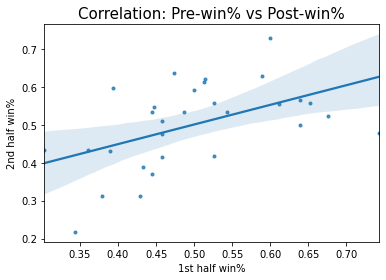

In [25]:
# Let's plot the variables and fit the model
sns.regplot(x='win_pct_pre', y='win_pct_pos', data=nhl2016_pos,  marker='.')
plt.xlabel('1st half win%')
plt.ylabel('2nd half win%')
plt.title("Correlation: Pre-win% vs Post-win%", fontsize=15)

Run the regression using win% from the 1st half of the regular season

In [26]:
WinPct_lm = smf.ols(formula = 'win_pct_pos ~ win_pct_pre', data=nhl2016_pos).fit()
WinPct_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            win_pct_pos   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     9.159
Date:                Thu, 17 Nov 2022   Prob (F-statistic):            0.00526
Time:                        22:02:37   Log-Likelihood:                 27.930
No. Observations:                  30   AIC:                            -51.86
Df Residuals:                      28   BIC:                            -49.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2417      0.087      2.766      0.010       0.063       0.421
win_pct_pre     0.5187      0.171      3.026      0.005       0.168       0.870
==============================================================================
Omnibus:                        0.703   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.727
Skew:                          -0.143   Prob(JB):                        0.695
Kurtosis:                       2.293   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Correlation: Pre-Pyth.win% vs Post-win%')

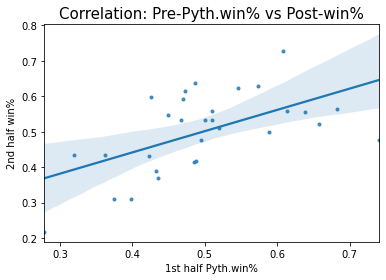

In [27]:
sns.regplot(x='pyth_wpct_pre', y='win_pct_pos', data=nhl2016_pos,  marker='.')
plt.xlabel('1st half Pyth.win%')
plt.ylabel('2nd half win%')
plt.title("Correlation: Pre-Pyth.win% vs Post-win%", fontsize=15)

Run the regression using pyth_win% from the 1st half of the regular season

In [28]:
PythWin_lm = smf.ols(formula = 'win_pct_pos ~ pyth_wpct_pre', data=nhl2016_pos).fit()
PythWin_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            win_pct_pos   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     13.56
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           0.000978
Time:                        22:02:38   Log-Likelihood:                 29.609
No. Observations:                  30   AIC:                            -55.22
Df Residuals:                      28   BIC:                            -52.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2019      0.083      2.435      0.022       0.032       0.372
pyth_wpct_pre     0.5996      0.163      3.682      0.001       0.266       0.933
==============================================================================
Omnibus:                        1.967   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.129
Skew:                           0.038   Prob(JB):                        0.569
Kurtosis:                       2.053   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5. Model Comparison

We can combine the regression results from each model in a table format

In [29]:
from statsmodels.iolib.summary2 import summary_col
info_dict={'R-squared' : lambda x: f"{x.rsquared:.2f}"}
Header = ['1','2']
Table_1 = summary_col([WinPct_lm, PythWin_lm,],\
                      regressor_order=['Intercept','Win%','Pyth.Win%'], model_names = Header, info_dict=info_dict)
print(Table_1)


                 1        2    
-------------------------------
Intercept     0.2417   0.2019  
              (0.0874) (0.0829)
R-squared     0.2196   0.3022  
              0.2465   0.3263  
pyth_wpct_pre          0.5996  
                       (0.1628)
win_pct_pre   0.5187           
              (0.1714)         
R-squared     0.25     0.33    
Standard errors in parentheses.


### Summary:

#### Regression using Pythagorean win% fit the data better than the regression using win% as an predictor variable. 

## The End